### Importing data from Kaggle

In [1]:
!pip install kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadshahrayar","key":"60e4d9b89f922c90d4e4710be16100a7"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d heptapod/titanic

  0% 0.00/10.8k [00:00<?, ?B/s]
100% 10.8k/10.8k [00:00<00:00, 9.49MB/s]


### Unzip data

In [7]:
from zipfile import ZipFile

with ZipFile("/content/titanic.zip",'r') as ref:
  ref.extractall()



---



In [8]:
import os

In [9]:
os.rename('train_and_test2.csv','Titanic_dataset.csv')

### Importing libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
data = pd.read_csv("/content/Titanic_dataset.csv")
data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [12]:
data.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.385027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.865560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [13]:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengerid,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Age,1309.0,29.503186,12.905241,0.17,22.0000,28.0000,35.000,80.0000
Fare,1309.0,33.281086,51.741500,0.00,7.8958,14.4542,31.275,512.3292
Sex,1309.0,0.355997,0.478997,0.00,0.0000,0.0000,1.000,1.0000
sibsp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
zero,1309.0,0.000000,0.000000,0.00,0.0000,0.0000,0.000,0.0000
zero.1,1309.0,0.000000,0.000000,0.00,0.0000,0.0000,0.000,0.0000
zero.2,1309.0,0.000000,0.000000,0.00,0.0000,0.0000,0.000,0.0000
zero.3,1309.0,0.000000,0.000000,0.00,0.0000,0.0000,0.000,0.0000
zero.4,1309.0,0.000000,0.000000,0.00,0.0000,0.0000,0.000,0.0000


### Dropping unnecessary features

In [14]:
data.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [15]:
data.iloc[::,[5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,22,23,25,26]].head()

,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,zero.15,zero.16,zero.17,zero.18
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
d_data = data.iloc[::,[5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,22,23,25,26]]
d_data.describe()

,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,zero.15,zero.16,zero.17,zero.18
count,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
data.iloc[::,[5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,22,23,25,26]].keys()

Index(['zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6',
       'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12',
       'zero.13', 'zero.14', 'zero.15', 'zero.16', 'zero.17', 'zero.18'],
      dtype='object')

In [18]:
data.drop(labels=['zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6',
       'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12',
       'zero.13', 'zero.14', 'zero.15', 'zero.16', 'zero.17', 'zero.18'], axis=1, inplace=True)

In [19]:
data.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [20]:
data.describe()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1307.000000,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.385027,2.294882,1.492731,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.865560,0.837836,0.814626,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,9.000000,3.000000,2.000000,1.000000


#### Checking for null values

In [21]:
data.isnull().sum().any()

True

In [22]:
data.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
2urvived       0
dtype: int64

In [23]:
data.Embarked.value_counts()

2.0    914
0.0    270
1.0    123
Name: Embarked, dtype: int64

In [24]:
data.Embarked.mode()

0    2.0
dtype: float64

In [25]:
data.Embarked = data.Embarked.fillna(0)

In [26]:
data.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       0
2urvived       0
dtype: int64

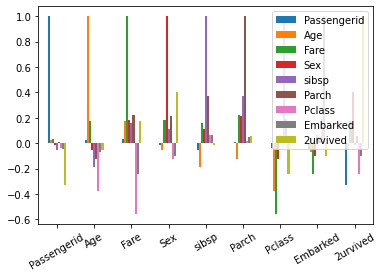

In [27]:
data.corr().plot(kind='bar', rot=30)
plt.show()

### Average Age of people in Titanic

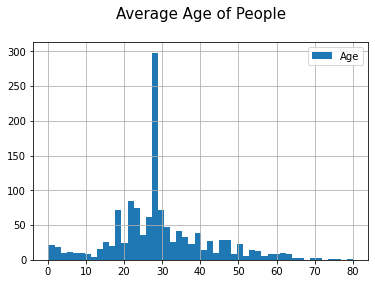

In [28]:
data.Age.hist(bins=50, legend=1)
plt.title("Average Age of People\n", size=15)
plt.savefig('Average_age.png', bbox='tight', pad_inches=2)
plt.show()

In [29]:
data.Age.mean()

29.50318563789152

### Checking for imbalanced data

In [30]:
data.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass',
       'Embarked', '2urvived'],
      dtype='object')

In [31]:
data.rename({"2urvived":"Survived"},axis=1, inplace=True)

In [32]:
data.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [33]:
# sur = list()
# not_sur = list()

In [34]:
sur = data[data['Survived'] == 1].shape[0]

sur

342

In [35]:
# sur = [i for i in range(1,sur+1)]
# print(sur)

In [36]:
not_sur = data[data['Survived'] == 0].shape[0]

not_sur

967

In [37]:
# not_sur = [i for i in range(1,not_sur+1)]
# print(not_sur)

In [38]:
# sur = np.asarray(sur)
# not_sur = np.asarray(not_sur)

### Total number Survival and Non Survivals

In [39]:
LABELS = ['Not Survived','Survived']

In [40]:
count_classes = pd.value_counts(data['Survived'], sort = True)

count_classes

0    967
1    342
Name: Survived, dtype: int64

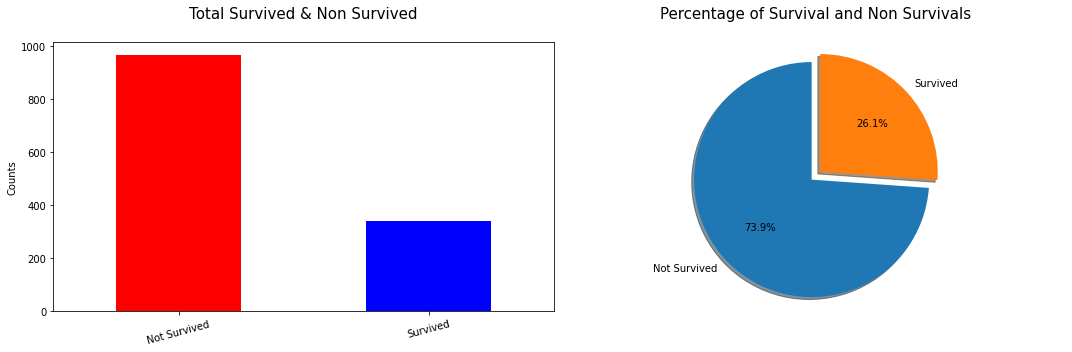

In [41]:
plt.figure(figsize=(15,5))

plt.subplot(121)
count_classes.plot(kind = 'bar', rot=15, color=['red','b'])
plt.title("Total Survived & Non Survived\n",size=15)
plt.xticks(range(2), labels = LABELS)
plt.ylabel("Counts")    
plt.tight_layout()                                     

plt.subplot(122)
plt.pie(count_classes, labels=LABELS, shadow=True, autopct = '%0.1f%%', explode=[0,0.1], startangle=90)
plt.title("Percentage of Survival and Non Survivals\n",size=15)
plt.axis('Equal')
plt.tight_layout()


plt.savefig('Total_survived.png',
            bbox='tight',
            pad_inches=2)

plt.show()

### **Above graph show total survived and not survived**



---



### Gender wise data distribution

In [42]:
data.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [43]:
gen_counts = pd.value_counts(data['Sex'],)

In [44]:
gen_counts

0    843
1    466
Name: Sex, dtype: int64

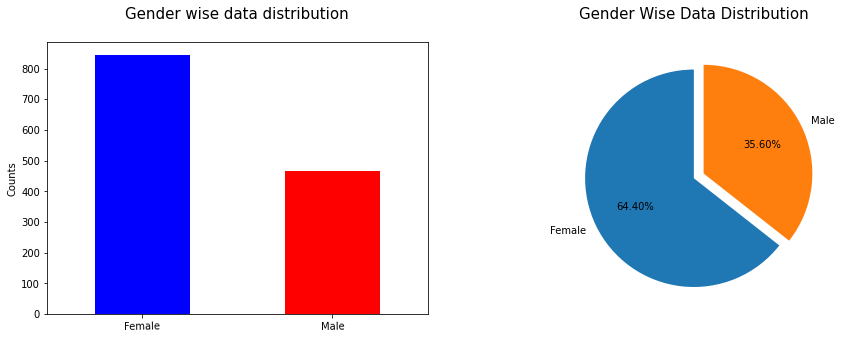

<Figure size 432x288 with 0 Axes>

In [45]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
gen_counts.plot(kind='bar', rot=1, color=['b','r'])
plt.xticks(range(2), labels=['Female','Male'])
plt.ylabel("Counts")
plt.title("Gender wise data distribution\n", size=15)


plt.subplot(1,2,2)
plt.pie(gen_counts, labels=['Female','Male'], explode=[0,0.1], startangle=90, autopct="%0.2f%%")
plt.title("Gender Wise Data Distribution\n", size=15)
plt.show()

plt.savefig('genders.png',
            bbox='tight',
            pad_inches=2)

plt.show()

### Now to check who survived most Male or Female

In [46]:
survived_data = data[data['Survived'] == 1]
survived_data.shape

(342, 9)

In [47]:
gen_survived = pd.value_counts(survived_data.Sex, sort=True)
gen_survived

1    233
0    109
Name: Sex, dtype: int64

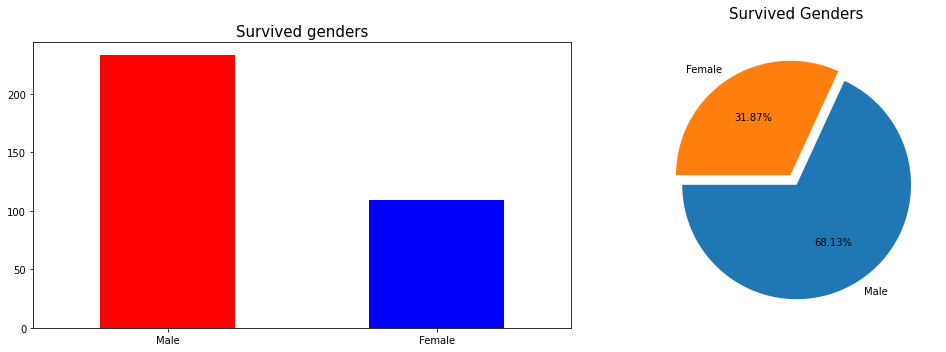

<Figure size 432x288 with 0 Axes>

In [48]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
gen_survived.plot(kind='bar', rot=0, color=['r','b'])
plt.title("Survived genders", size=15)
plt.xticks(range(2), labels=['Male', "Female"])
# plt.tight_layout()

plt.subplot(1,2,2)
plt.pie(gen_survived, labels=['Male','Female'],autopct="%0.2f%%", startangle=180, explode=[0,0.1])
plt.title("Survived Genders\n", size=15)
plt.tight_layout()

plt.show()

plt.savefig('survived_gen.png',
            bbox='tight')

### Total numbers of Males and how many of them survived

In [49]:
data.Sex.value_counts()

0    843
1    466
Name: Sex, dtype: int64

##### **Female: 843**
##### **Male: 466**

In [50]:
men_sur = data[(data.Sex == 1) & (data.Survived == 1)]
men_sur.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
8,9,27.0,11.1333,1,0,2,3,2.0,1
9,10,14.0,30.0708,1,1,0,2,0.0,1


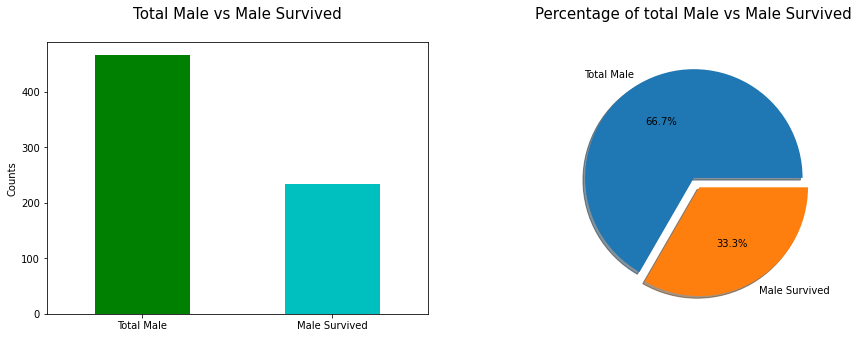

In [51]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
pd.Series([466,233]).plot(kind='bar', rot=0, color=['g','c'])
plt.xticks(range(2), labels=['Total Male', 'Male Survived'])
plt.ylabel("Counts")
plt.title("Total Male vs Male Survived\n", size=15)


plt.subplot(1,2,2)
plt.pie(pd.Series([466,233]), explode=[0,0.1],
        labels=['Total Male', 'Male Survived'],
        autopct='%.1f%%', shadow=1)
plt.title("Percentage of total Male vs Male Survived\n", size=15)


plt.savefig('total_male_vs_male_survived.png')

In [52]:
(233*100)/466

50.0

### **So 50% of Male Survived**

In [53]:
# ----------------------------------------------------------

### Total numbers of Female and how many of them survived

In [54]:
data.Sex.value_counts()

0    843
1    466
Name: Sex, dtype: int64

In [55]:
female_sur = data[(data.Sex == 0) & (data.Survived == 1)]
female_sur.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
17,18,28.0,13.0000,0,0,0,2,2.0,1
21,22,34.0,13.0000,0,0,0,2,2.0,1
23,24,28.0,35.5000,0,0,0,1,2.0,1
36,37,28.0,7.2292,0,0,0,3,0.0,1
55,56,28.0,35.5000,0,0,0,1,2.0,1


In [56]:
female_sur.shape

(109, 9)

In [57]:
female_sur.Sex.value_counts()

0    109
Name: Sex, dtype: int64

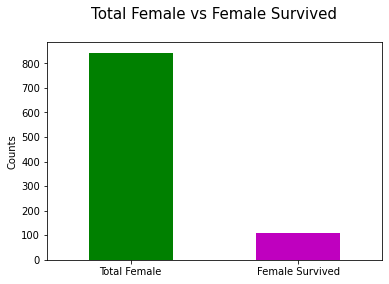

In [58]:
pd.Series([843,109]).plot(kind='bar',rot=0, color=['g','m'])
plt.title("Total Female vs Female Survived\n", size=15)
plt.ylabel("Counts")
plt.xticks(range(2), labels=['Total Female','Female Survived'])
plt.show()

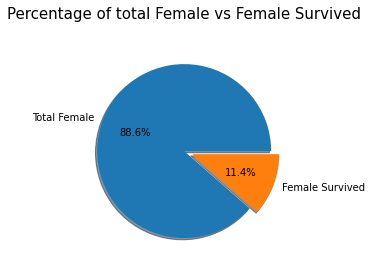

In [59]:
plt.pie(pd.Series([843,109]),
        explode=[0,0.1],
        labels=['Total Female','Female Survived'],
        autopct='%.1f%%', shadow=True)
plt.title("Percentage of total Female vs Female Survived\n", size=15)
plt.show()

In [60]:
(109*100)/843


12.930011862396205

### **Only 13% of Female Survived** 



---



---



### Now to check who died most Male or Female

In [61]:
not_Servived_Data = data[data['Survived'] == 0]
not_Servived_Data.shape

(967, 9)

In [62]:
not_Servived_Data = pd.value_counts(not_Servived_Data['Sex'])
not_Servived_Data

0    734
1    233
Name: Sex, dtype: int64

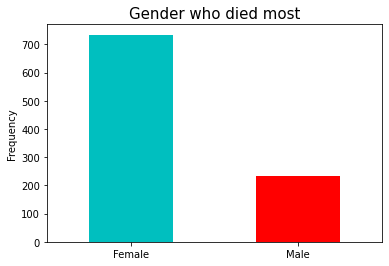

In [63]:
not_Servived_Data.plot(kind='bar',rot=0, color=['c','r'])
plt.title("Gender who died most", size=15)
plt.xticks(range(2), labels=['Female','Male'])
plt.ylabel("Frequency")
plt.show()

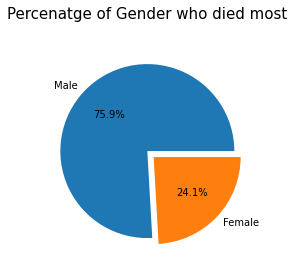

In [64]:
plt.pie(not_Servived_Data, labels=['Male',"Female"], autopct="%0.1f%%", explode=[0,.1])
plt.title("Percenatge of Gender who died most\n", size=15)

plt.show()

### Analyzing Passenger's Class

In [65]:
data.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass',
       'Embarked', 'Survived'],
      dtype='object')

In [66]:
data.rename({"Pclass":"Passenger_Class"}, axis=1, inplace=1)

In [67]:
data.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch',
       'Passenger_Class', 'Embarked', 'Survived'],
      dtype='object')

In [68]:
data.Passenger_Class.unique() 

array([3, 1, 2])

In [69]:
data[data.Passenger_Class == 1].shape

(323, 9)

In [70]:
data[data.Passenger_Class == 2].shape

(277, 9)

In [71]:
data[data.Passenger_Class == 3].shape

(709, 9)

In [72]:
data.shape[0] == data[data.Passenger_Class == 1].shape[0] + data[data.Passenger_Class == 2].shape[0] + data[data.Passenger_Class == 3].shape[0]

True

In [73]:
# --------------------------------------------------------------------------------------

In [74]:
p_class = data.Passenger_Class.value_counts()
p_class

3    709
1    323
2    277
Name: Passenger_Class, dtype: int64

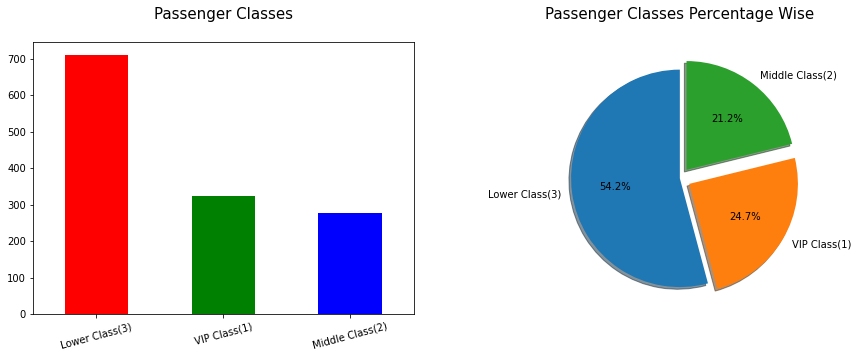

In [75]:
plt.figure(figsize=(15,5))

plt.subplot(121)
p_class.plot(kind='bar',rot=15, color = ['r','g','b'])
plt.xticks(range(3), labels=['Lower Class(3)','VIP Class(1)','Middle Class(2)'])
plt.title("Passenger Classes\n", size=15)
# plt.show()

plt.subplot(122)
plt.pie(p_class,explode=[0,0.1,.1],
        labels=['Lower Class(3)','VIP Class(1)','Middle Class(2)'],shadow=True,
        autopct='%0.1f%%', startangle=90,radius=1)
plt.title("Passenger Classes Percentage Wise\n", size=15)
# plt.show()

plt.savefig('Passenger_Classes.png')



---
#### Now to find how many **VIP, MIDDLE, LOWER** class people who survived


In [76]:
data.head(2)

,Passengerid,Age,Fare,Sex,sibsp,Parch,Passenger_Class,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1


In [77]:
vip_sur = data[(data.Passenger_Class == 1) & (data.Survived == 1)]
vip_sur.tail()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Passenger_Class,Embarked,Survived
862,863,48.0,25.9292,1,0,0,1,2.0,1
871,872,47.0,52.5542,1,1,1,1,2.0,1
879,880,56.0,83.1583,1,0,1,1,0.0,1
887,888,19.0,30.0000,1,0,0,1,2.0,1
889,890,26.0,30.0000,0,0,0,1,0.0,1


In [78]:
vip_sur.shape

(136, 9)

In [79]:
vip_sur.Passenger_Class.unique()

array([1])

In [80]:
vip_sur = vip_sur.Sex.value_counts()
vip_sur

1    91
0    45
Name: Sex, dtype: int64

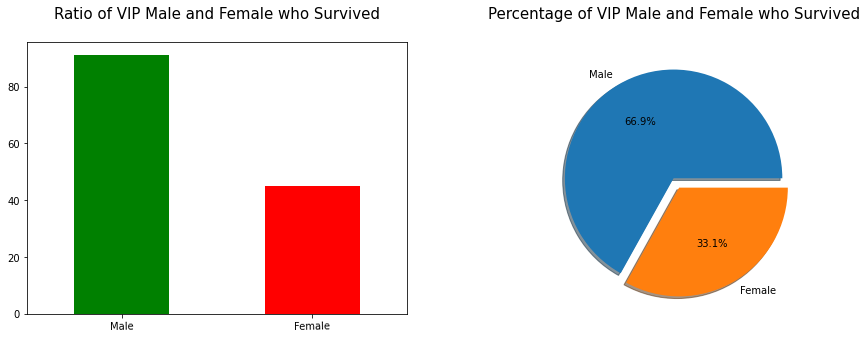

In [81]:
plt.figure(figsize=(15,5))

plt.subplot(121)
vip_sur.plot(kind='bar', color=['g','r'], rot=1)
plt.xticks(range(2), labels=['Male','Female'])
plt.title("Ratio of VIP Male and Female who Survived\n", size=15)


plt.subplot(122)
plt.pie(vip_sur, labels=['Male','Female'], autopct="%.1f%%",explode=[0,0.1],shadow=True)
plt.title("Percentage of VIP Male and Female who Survived\n", size=15)

plt.savefig('VIP_Survived.png')

In [82]:
# -------------------------------------------------------------------

In [83]:
middle_sur = data[(data['Passenger_Class'] == 2) & (data.Survived == 1)]
middle_sur.tail()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Passenger_Class,Embarked,Survived
831,832,0.83,18.7500,0,1,1,2,2.0,1
865,866,42.00,13.0000,1,0,0,2,2.0,1
866,867,27.00,13.8583,1,1,0,2,0.0,1
874,875,28.00,24.0000,1,1,0,2,0.0,1
880,881,25.00,26.0000,1,0,1,2,2.0,1


In [84]:
middle_sur.shape

(87, 9)

In [85]:
middle_sur = middle_sur.Sex.value_counts()
middle_sur

1    70
0    17
Name: Sex, dtype: int64

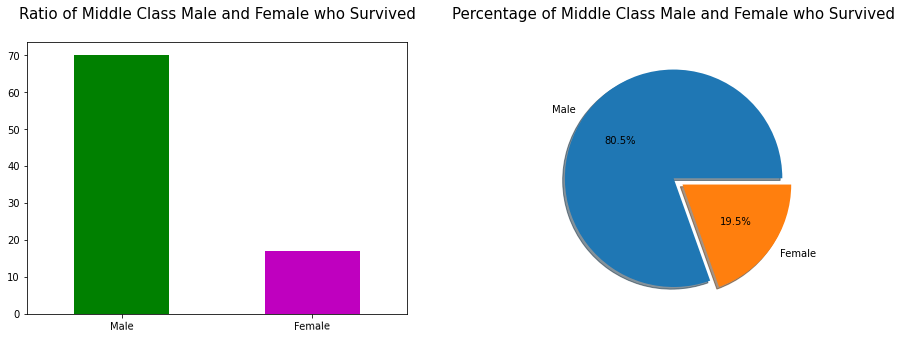

In [86]:
plt.figure(figsize=(15,5))

plt.subplot(121)
middle_sur.plot(kind='bar',rot=1, color=['g','m'])
plt.xticks(range(2), labels=['Male','Female'])
plt.title("Ratio of Middle Class Male and Female who Survived\n", size=15)
# plt.show()

plt.subplot(122)

plt.pie(middle_sur, labels=['Male','Female'], explode=[0,0.1], shadow=True, autopct='%.1f%%')
plt.title("Percentage of Middle Class Male and Female who Survived\n", size=15)
# plt.show()

plt.savefig("Middle_Survived.png")

In [87]:
# ---------------------------------------------------------------------------

In [88]:
lower_sur = data[(data.Passenger_Class == 3) & (data.Survived == 1)]
lower_sur.tail() 

,Passengerid,Age,Fare,Sex,sibsp,Parch,Passenger_Class,Embarked,Survived
838,839,32.0,56.4958,0,0,0,3,2.0,1
855,856,18.0,9.3500,1,0,1,3,2.0,1
858,859,24.0,19.2583,1,0,3,3,0.0,1
869,870,4.0,11.1333,0,1,1,3,2.0,1
875,876,15.0,7.2250,1,0,0,3,0.0,1


In [89]:
lower_sur.shape

(119, 9)

In [90]:
lower_sur = pd.value_counts(lower_sur.Sex)
lower_sur

1    72
0    47
Name: Sex, dtype: int64

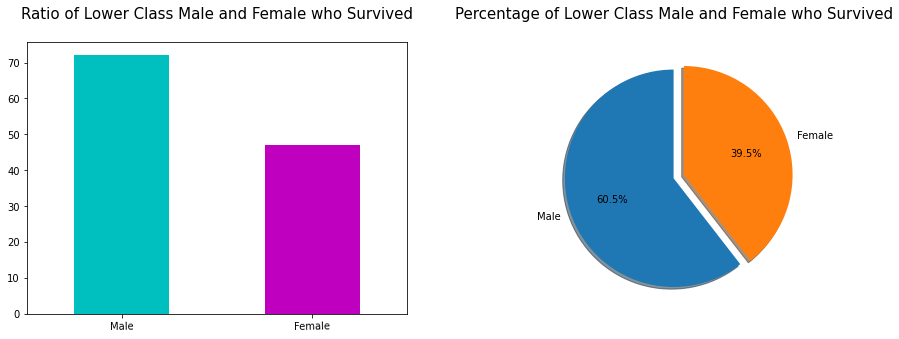

In [91]:
plt.figure(figsize=(15,5))

plt.subplot(121)
lower_sur.plot(kind='bar', rot=1, color=['c','m'])
plt.xticks(range(2), labels=['Male','Female'])
plt.title("Ratio of Lower Class Male and Female who Survived\n", size=15)

plt.subplot(122)
plt.pie(lower_sur, labels=['Male','Female'], explode=[0,0.1], autopct='%0.1f%%', shadow=True, startangle=90)
plt.title("Percentage of Lower Class Male and Female who Survived\n", size=15)

plt.savefig("Lower_Survived.png")

### Now finding many childs are in Titanic and how much of them survived and not survived

In [92]:
data.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Passenger_Class,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [93]:
 data.Age.unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  , 22.5 , 18.5 ,
       67.  , 76.  , 26.5 , 60.5 , 11.5 ,  0.33,  0.17, 38.5 ])

In [94]:
child_sub_data = data[data.Age < 12.0]

child_sub_data.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Passenger_Class,Embarked,Survived
7,8,2.0,21.0750,0,3,1,3,2.0,0
10,11,4.0,16.7000,1,1,1,3,2.0,1
16,17,2.0,29.1250,0,4,1,3,1.0,0
24,25,8.0,21.0750,1,3,1,3,2.0,0
43,44,3.0,41.5792,1,1,2,2,0.0,1


In [95]:
child_sub_data.shape

(91, 9)

In [96]:
c_sub_data = child_sub_data.Sex.value_counts()
c_sub_data

0    49
1    42
Name: Sex, dtype: int64

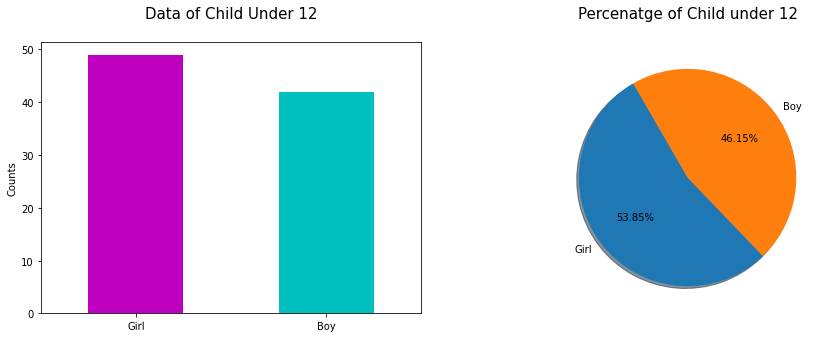

In [97]:
plt.figure(figsize=(15,5))

plt.subplot(121)
c_sub_data.plot(kind='bar', rot=1, color=['m','c'])
plt.title('Data of Child Under 12\n', size=15)
plt.xticks(range(2), labels=['Girl','Boy'])
plt.ylabel("Counts")

plt.subplot(122)
plt.pie(c_sub_data, 
        labels=["Girl","Boy"],
        autopct="%.2f%%",
        shadow=True,
        startangle=120)

plt.title("Percenatge of Child under 12\n", size=15)

plt.savefig(fname='Child_Under_12.png')

In [98]:
# ----------------------------------------------------

### Total Survival under age of 12

In [99]:
sur_child = child_sub_data[child_sub_data.Survived == 1]

sur_child.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Passenger_Class,Embarked,Survived
10,11,4.00,16.7000,1,1,1,3,2.0,1
43,44,3.00,41.5792,1,1,2,2,0.0,1
58,59,5.00,27.7500,1,1,2,2,2.0,1
78,79,0.83,29.0000,0,0,2,2,2.0,1
165,166,9.00,20.5250,0,0,2,3,2.0,1


In [100]:
sur_child.shape

(39, 9)

In [101]:
sur_child = sur_child.Sex.value_counts()
sur_child

0    20
1    19
Name: Sex, dtype: int64

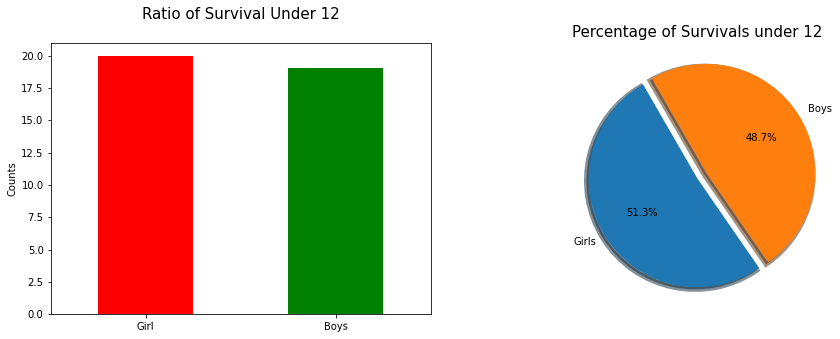

In [102]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sur_child.plot(kind='bar', rot=1, color=['r','g'])
plt.xticks(range(2), labels=['Girl','Boys'])
plt.title("Ratio of Survival Under 12\n", size=15)
plt.ylabel("Counts")

plt.subplot(122)
plt.pie(sur_child, explode=[0,0.1],
        labels=['Girls','Boys'],
        autopct='%.1f%%',
        shadow=1,
        startangle=120,
        wedgeprops = {'linewidth': 5})

plt.title('Percentage of Survivals under 12', size=15)

plt.savefig("Survived_Under_12.png")

### Correlation

In [103]:
numerical_data = data.iloc[::,[1,3,-1]]

In [104]:
numerical_data.head()

,Age,Sex,Survived
0,22.0,0,0
1,38.0,1,1
2,26.0,1,1
3,35.0,1,1
4,35.0,0,0


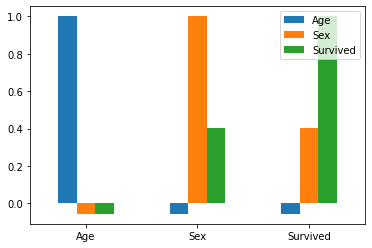

In [105]:
numerical_data.corr().plot(kind='bar', rot=0)
plt.show()



---





### **My Findings**
- **Average age of people is**: 30
- **Survival vs Non survival**
  - Number of survival: 342 (26.1%)
  - Number of non survival: 967 (73.9%)
- **Total Number of**
 - Female is: 843 (64.40%)
 - Male is: 466 (35.60%)

- **Total Number of**
 - Male survived: 233 (68.13%)
 - Female survived: 109 (31.87%)

- **Total** 
  - Male: 466
  - Male Survived: 233 (50%)
  - Female: 843
  - Female Survived: 109 (13%)

- **Total Passengers of Status**
  - **VIP is**: 323 (24.7% of total)
   - Survived 136 from 323
     - 91 Male (66% from all VIP Status Passengers)
     - 45 Female (33% from all VIP Status Passenger)

  - **Middle Class is**: 277 (21.2% of total Passengers)
   - Survived 87 from 277
     - 70 Male (80.5% from all Middle Class Status Passengers)
     - 17 Female (19.5% from all Middle Class Status Passengers)

  - **Lower Class is**: 709 (54.2% of total Passengers)
    - Survived 119 from 709
      - 72 Male (60.5% from all Lower Class Status Passengers) 
      - 47 Female (39.5% from all Lower Class Status Passengers)

- **Childs under the age of 12**
   - Total: 91
     - Boy: 42 (46.15%)
     - Girl: 49 (53.85%)

- **Survived Childs under the age of 12**
  - Total survived: 39
    - Boy: 19 (48.7%)
    - Girl: 20 (51.3%)
